In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, matthews_corrcoef, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the dataset
data = pd.read_csv('dataset.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# checking the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking if there is any missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# taking care of the duplicate values
print(data.shape)
data_dup = data.duplicated().any()
if(data_dup) :
    data = data.drop_duplicates()
print(data.shape)

(303, 14)
(302, 14)


In [8]:
# data processing
# separating the categorical values and continuous values
categorical_val = []
continuous_val = []
for column in data.columns:
    if data[column].nunique() <=10:      # if number of unique values is less than equal to 10 then considering that feature as caetegorical in nature
        categorical_val.append(column)
    else:
        continuous_val.append(column)    # otherwise feature is continuous 

In [9]:
# displaying the categorical columns
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
# displaying the continuous columns
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
# Feature Scaling
st = StandardScaler()
data[continuous_val] = st.fit_transform(data[continuous_val])

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [13]:
#Splitting The Dataset Into The Training Set And Test Set
X = data.drop('target',axis=1)    #consists of all the features
y = data['target']                #consists of the values of the target variable 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [14]:
X_train.shape

(241, 13)

In [15]:
X_test.shape

(61, 13)

In [18]:
# Fitting a logistic regression model to the training data
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#predicting the target values
y_pred = log_model.predict(X_test)

y_pred_quant = log_model.predict_proba(X_test)[:, 1] # Store predicted probabilites

training_accuracy = log_model.score(X_train, y_train)
test_accuracy = log_model.score(X_test, y_test)

print("Training Accuracy :", training_accuracy)
print("Testing Accuracy (in percentage) :", test_accuracy)

Training Accuracy : 0.8713692946058091
Testing Accuracy (in percentage) : 0.8360655737704918


Confusion Matrix:
[[25  4]
 [ 6 26]]


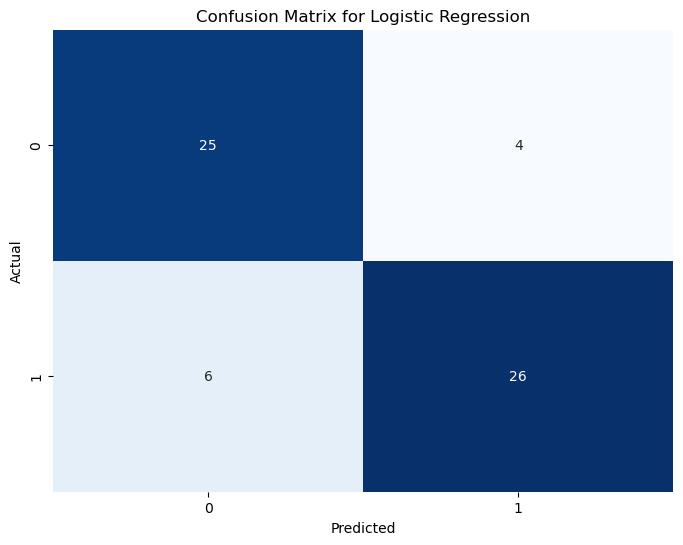

Precision: 0.8666666666666667
Recall: 0.8125
Specificity: 0.8620689655172413
MCC: 0.6738432321543399
F1 Score: 0.8387096774193549


In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

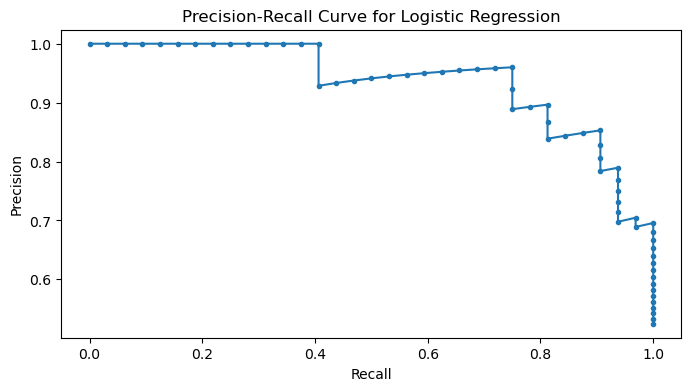

In [17]:
# PR Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, log_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 4))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()

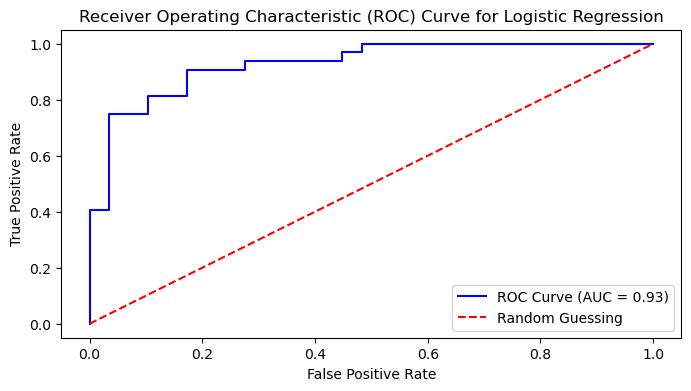

In [19]:
# Predicting the probabilities for positive class (class 1)
y_proba = log_model.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

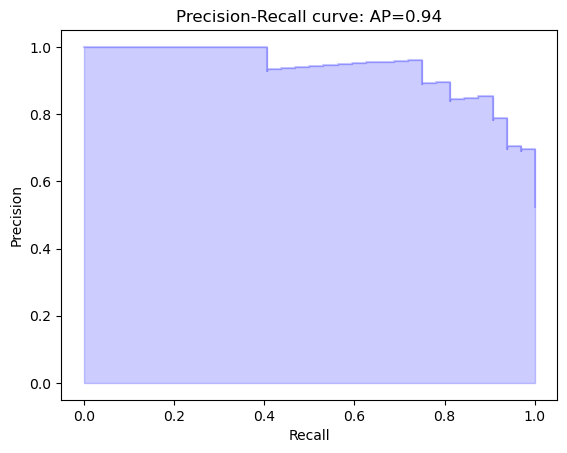

In [19]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# Calculate average precision and Precision-Recall curve
average_precision = average_precision_score(y_test, y_pred_quant)
precision, recall, _ = precision_recall_curve(y_test, y_pred_quant)

# Plot Precision-Recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()